In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import shutil
import random
import matplotlib.pyplot as plt
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
%matplotlib inline


Models

modelbw- mobilenet with dark bg
modelbw1-mobilenet with light bg
modelbw2-custom model



# Model 2 DPQ


In [2]:
train_path = "D:\College\Sem 4\Mini Project\DP\Train"
test_path = "D:\College\Sem 4\Mini Project\DP\Test"

train_batches = ImageDataGenerator().flow_from_directory(directory=train_path,target_size=(224,224),class_mode='categorical',batch_size=10)

test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224,224), class_mode='categorical', batch_size=10, shuffle=False)
                                             
                                             
    
                 




Found 1000 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

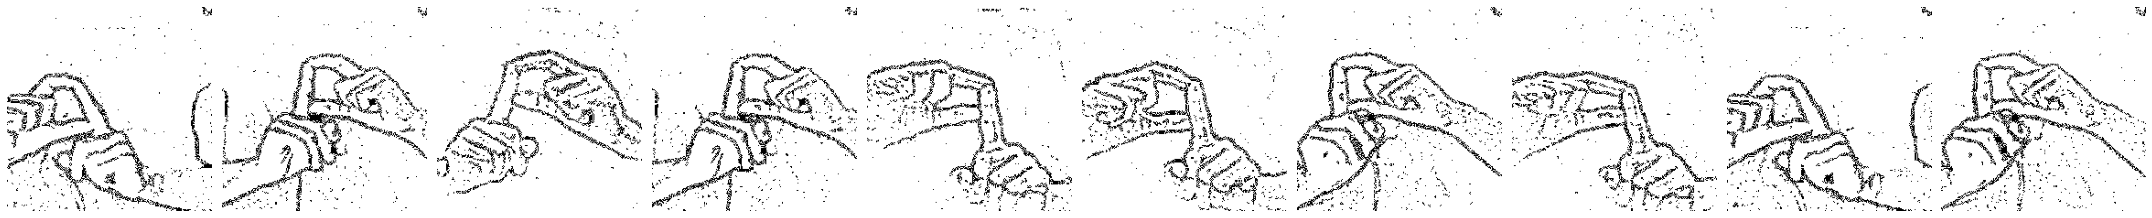

(10, 224, 224, 3)
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [3]:
imgs, labels = next(train_batches)
#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(imgs.shape)
print(labels)

In [4]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(128,activation ="relu"))

model.add(Dense(2,activation ="softmax"))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [6]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
# early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

# model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
# early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [7]:
history2 = model.fit(x=train_batches, epochs=10, validation_data = test_batches)


Epoch 1/10
100/100 [==============================] - 91s 912ms/step - loss: 3.7609 - accuracy: 0.8890 - val_loss: 2.8718 - val_accuracy: 0.3800
Epoch 2/10
100/100 [==============================] - 96s 957ms/step - loss: 1.1153e-05 - accuracy: 1.0000 - val_loss: 3.5404 - val_accuracy: 0.3133
Epoch 3/10
100/100 [==============================] - 96s 960ms/step - loss: 2.5003e-06 - accuracy: 1.0000 - val_loss: 4.3393 - val_accuracy: 0.2533
Epoch 4/10
100/100 [==============================] - 97s 973ms/step - loss: 2.6786e-07 - accuracy: 1.0000 - val_loss: 4.6078 - val_accuracy: 0.2667
Epoch 5/10
100/100 [==============================] - 98s 978ms/step - loss: 6.5207e-08 - accuracy: 1.0000 - val_loss: 4.8441 - val_accuracy: 0.2667
Epoch 6/10
100/100 [==============================] - 99s 990ms/step - loss: 3.0994e-08 - accuracy: 1.0000 - val_loss: 5.0247 - val_accuracy: 0.2667
Epoch 7/10
100/100 [==============================] - 102s 1s/step - loss: 1.8597e-08 - accuracy: 1.0000 - val

In [8]:
imgs, labels = next(test_batches) 
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')


loss of 9.109590530395508; accuracy of 10.000000149011612%


In [9]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.figure(figsize = (15,10))
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without normalization")
    print(cm)
    
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")
        
        plt.tight_layout()
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

In [10]:
test_labels=test_batches.classes
predictions = model.predict(test_batches, verbose=2)
predictions

30/30 - 8s


array([[8.4265900e-01, 1.5734094e-01],
       [3.1250519e-01, 6.8749487e-01],
       [1.0054498e-01, 8.9945501e-01],
       [3.5340263e-06, 9.9999642e-01],
       [1.0791786e-06, 9.9999893e-01],
       [1.0791786e-06, 9.9999893e-01],
       [6.3464454e-06, 9.9999368e-01],
       [6.3464454e-06, 9.9999368e-01],
       [7.8992161e-06, 9.9999213e-01],
       [7.8992161e-06, 9.9999213e-01],
       [4.1737043e-05, 9.9995828e-01],
       [4.1737043e-05, 9.9995828e-01],
       [1.9869829e-05, 9.9998009e-01],
       [1.4756961e-01, 8.5243040e-01],
       [1.9869829e-05, 9.9998009e-01],
       [1.2916576e-07, 9.9999988e-01],
       [1.2916576e-07, 9.9999988e-01],
       [1.9575130e-07, 9.9999976e-01],
       [1.9575130e-07, 9.9999976e-01],
       [1.4943789e-07, 9.9999988e-01],
       [1.4943789e-07, 9.9999988e-01],
       [9.9485781e-08, 9.9999988e-01],
       [9.9485781e-08, 9.9999988e-01],
       [2.3889854e-07, 9.9999976e-01],
       [1.4756961e-01, 8.5243040e-01],
       [2.3889854e-07, 9.

In [11]:
cm=confusion_matrix(y_true=test_labels,y_pred=predictions.argmax(axis=1))

In [12]:
test_batches.class_indices

{'D': 0, 'P': 1}

Confusion Matrix without normalization
[[  9 141]
 [ 77  73]]


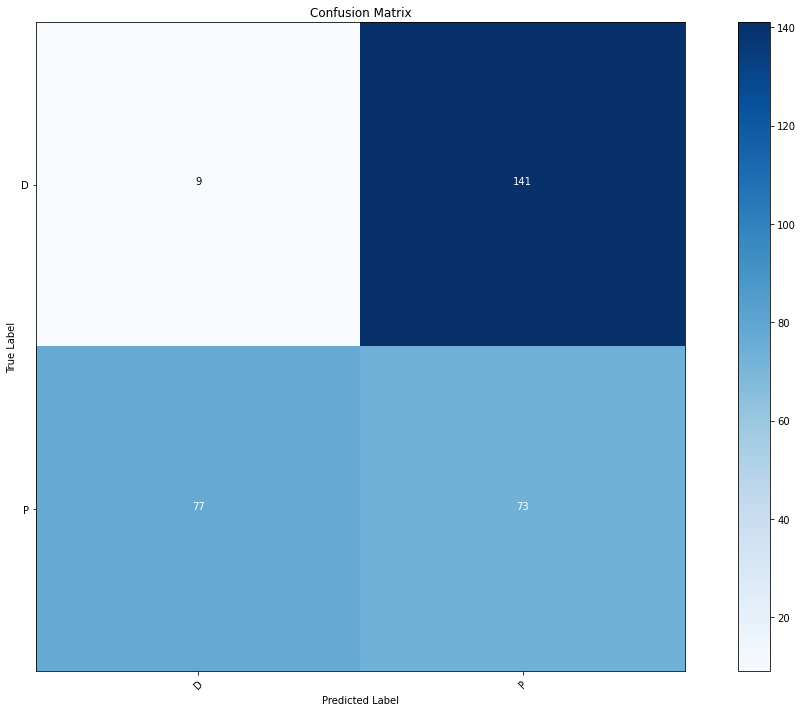

In [13]:
cm_plot_labels=['D','P']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels,title='Confusion Matrix')

In [ ]:
model_jsondp = model.to_json()
with open("model-bw-dp.json", "w") as json_file:
    json_file.write(model_jsondp)
print('Model Saved')
model.save_weights('model-bw-dp.h5')
print('Weights saved')

# Using Mobile Net

In [2]:
mobile=tf.keras.applications.mobilenet.MobileNet()
train_path="D:\College\Sem 4\Mini Project\Live Data Dark Processed\Train"
test_path="D:\College\Sem 4\Mini Project\Live Data Dark Processed\Valid"

In [3]:
train_batches= ImageDataGenerator( rescale=1./255).flow_from_directory(
    directory=train_path,target_size=(224,224),batch_size=10)
test_batches= ImageDataGenerator( rescale=1./255).flow_from_directory(
    directory=test_path,target_size=(224,224),batch_size=10,shuffle=False)

Found 13500 images belonging to 27 classes.
Found 4050 images belonging to 27 classes.


(10, 224, 224, 3)


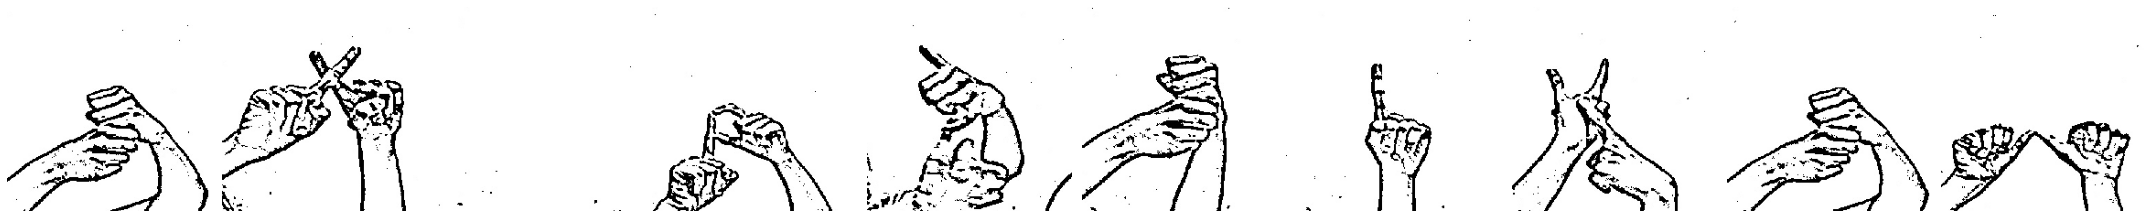

(10, 224, 224, 3)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]


In [4]:
imgs, labels = next(train_batches)
print(imgs.shape)
#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(imgs.shape)
print(labels)

In [5]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [6]:

x = mobile.layers[-6].output
output = Dense(units=27,activation='softmax')(x)
model=Model(inputs=mobile.input,outputs=output)

In [7]:
for layer in model.layers[:-21]:
    layer.trainable=False
    model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

Total params: 3,256,539
Trainable params: 3,234,651
Non-trainable params: 21,888
_________________________________________________________________
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112

Total params: 3,256,539
Trainable params: 3,233,723
Non-trainable params: 22,816
_________________________________________________________________
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112

_________________________________________________________________
conv_dw_10 (DepthwiseConv2D) (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_10_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_10_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_10 (Conv2D)          (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_10_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_10_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_11 (DepthwiseConv2D) (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_11

conv_pw_8 (Conv2D)           (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_8_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_8_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_9_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_9_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_9 (Conv2D)           (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_9_bn (BatchNormaliza (None, 14, 14, 512)       2048      
__________

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

conv_pw_7 (Conv2D)           (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_7_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_7_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_8 (DepthwiseConv2D)  (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_8_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_8_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_8 (Conv2D)           (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_8_bn (BatchNormaliza (None, 14, 14, 512)       2048      
__________

conv_pw_10_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_10_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_11 (DepthwiseConv2D) (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_11_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_11_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_11 (Conv2D)          (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_11_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_11_relu (ReLU)       (None, 14, 14, 512)       0         
__________

conv_dw_8_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_8_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_8 (Conv2D)           (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_8_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_8_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_9_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_9_relu (ReLU)        (None, 14, 14, 512)       0         
__________

conv_dw_5_bn (BatchNormaliza (None, 28, 28, 256)       1024      
_________________________________________________________________
conv_dw_5_relu (ReLU)        (None, 28, 28, 256)       0         
_________________________________________________________________
conv_pw_5 (Conv2D)           (None, 28, 28, 256)       65536     
_________________________________________________________________
conv_pw_5_bn (BatchNormaliza (None, 28, 28, 256)       1024      
_________________________________________________________________
conv_pw_5_relu (ReLU)        (None, 28, 28, 256)       0         
_________________________________________________________________
conv_pad_6 (ZeroPadding2D)   (None, 29, 29, 256)       0         
_________________________________________________________________
conv_dw_6 (DepthwiseConv2D)  (None, 14, 14, 256)       2304      
_________________________________________________________________
conv_dw_6_bn (BatchNormaliza (None, 14, 14, 256)       1024      
__________

conv_pw_2_bn (BatchNormaliza (None, 56, 56, 128)       512       
_________________________________________________________________
conv_pw_2_relu (ReLU)        (None, 56, 56, 128)       0         
_________________________________________________________________
conv_dw_3 (DepthwiseConv2D)  (None, 56, 56, 128)       1152      
_________________________________________________________________
conv_dw_3_bn (BatchNormaliza (None, 56, 56, 128)       512       
_________________________________________________________________
conv_dw_3_relu (ReLU)        (None, 56, 56, 128)       0         
_________________________________________________________________
conv_pw_3 (Conv2D)           (None, 56, 56, 128)       16384     
_________________________________________________________________
conv_pw_3_bn (BatchNormaliza (None, 56, 56, 128)       512       
_________________________________________________________________
conv_pw_3_relu (ReLU)        (None, 56, 56, 128)       0         
__________

conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pw_1 (Conv2D)           (None, 112, 112, 64)      2048      
_________________________________________________________________
conv_pw_1_bn (BatchNormaliza (None, 112, 112, 64)      256       
_________________________________________________________________
conv_pw_1_relu (ReLU)        (None, 112, 112, 64)      0         
__________

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

conv_pw_12_bn (BatchNormaliz (None, 7, 7, 1024)        4096      
_________________________________________________________________
conv_pw_12_relu (ReLU)       (None, 7, 7, 1024)        0         
_________________________________________________________________
conv_dw_13 (DepthwiseConv2D) (None, 7, 7, 1024)        9216      
_________________________________________________________________
conv_dw_13_bn (BatchNormaliz (None, 7, 7, 1024)        4096      
_________________________________________________________________
conv_dw_13_relu (ReLU)       (None, 7, 7, 1024)        0         
_________________________________________________________________
conv_pw_13 (Conv2D)          (None, 7, 7, 1024)        1048576   
_________________________________________________________________
conv_pw_13_bn (BatchNormaliz (None, 7, 7, 1024)        4096      
_________________________________________________________________
conv_pw_13_relu (ReLU)       (None, 7, 7, 1024)        0         
__________

conv_dw_10 (DepthwiseConv2D) (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_10_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_10_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_10 (Conv2D)          (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_10_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_10_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_11 (DepthwiseConv2D) (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_11_bn (BatchNormaliz (None, 14, 14, 512)       2048      
__________

conv_dw_10_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_10_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_10 (Conv2D)          (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_10_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_10_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_11 (DepthwiseConv2D) (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_11_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_11_relu (ReLU)       (None, 14, 14, 512)       0         
__________

conv_pw_13_relu (ReLU)       (None, 7, 7, 1024)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 27)                27675     
Total params: 3,256,539
Trainable params: 3,202,587
Non-trainable params: 53,952
_________________________________________________________________
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_______________________________________

conv_dw_12_bn (BatchNormaliz (None, 7, 7, 512)         2048      
_________________________________________________________________
conv_dw_12_relu (ReLU)       (None, 7, 7, 512)         0         
_________________________________________________________________
conv_pw_12 (Conv2D)          (None, 7, 7, 1024)        524288    
_________________________________________________________________
conv_pw_12_bn (BatchNormaliz (None, 7, 7, 1024)        4096      
_________________________________________________________________
conv_pw_12_relu (ReLU)       (None, 7, 7, 1024)        0         
_________________________________________________________________
conv_dw_13 (DepthwiseConv2D) (None, 7, 7, 1024)        9216      
_________________________________________________________________
conv_dw_13_bn (BatchNormaliz (None, 7, 7, 1024)        4096      
_________________________________________________________________
conv_dw_13_relu (ReLU)       (None, 7, 7, 1024)        0         
__________

conv_dw_13 (DepthwiseConv2D) (None, 7, 7, 1024)        9216      
_________________________________________________________________
conv_dw_13_bn (BatchNormaliz (None, 7, 7, 1024)        4096      
_________________________________________________________________
conv_dw_13_relu (ReLU)       (None, 7, 7, 1024)        0         
_________________________________________________________________
conv_pw_13 (Conv2D)          (None, 7, 7, 1024)        1048576   
_________________________________________________________________
conv_pw_13_bn (BatchNormaliz (None, 7, 7, 1024)        4096      
_________________________________________________________________
conv_pw_13_relu (ReLU)       (None, 7, 7, 1024)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 27)                27675     
Total para

_________________________________________________________________
conv_pw_8_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_9_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_9_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_9 (Conv2D)           (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_9_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_9_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_10

conv_dw_4_bn (BatchNormaliza (None, 28, 28, 128)       512       
_________________________________________________________________
conv_dw_4_relu (ReLU)        (None, 28, 28, 128)       0         
_________________________________________________________________
conv_pw_4 (Conv2D)           (None, 28, 28, 256)       32768     
_________________________________________________________________
conv_pw_4_bn (BatchNormaliza (None, 28, 28, 256)       1024      
_________________________________________________________________
conv_pw_4_relu (ReLU)        (None, 28, 28, 256)       0         
_________________________________________________________________
conv_dw_5 (DepthwiseConv2D)  (None, 28, 28, 256)       2304      
_________________________________________________________________
conv_dw_5_bn (BatchNormaliza (None, 28, 28, 256)       1024      
_________________________________________________________________
conv_dw_5_relu (ReLU)        (None, 28, 28, 256)       0         
__________

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

conv_pw_10 (Conv2D)          (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_10_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_10_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_11 (DepthwiseConv2D) (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_11_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_11_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_11 (Conv2D)          (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_11_bn (BatchNormaliz (None, 14, 14, 512)       2048      
__________

conv_pw_8_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_8_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_9_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_9_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_9 (Conv2D)           (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_9_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_9_relu (ReLU)        (None, 14, 14, 512)       0         
__________

conv_pw_6 (Conv2D)           (None, 14, 14, 512)       131072    
_________________________________________________________________
conv_pw_6_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_6_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_7 (DepthwiseConv2D)  (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_7_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_7_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_7 (Conv2D)           (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_7_bn (BatchNormaliza (None, 14, 14, 512)       2048      
__________

conv_pw_5 (Conv2D)           (None, 28, 28, 256)       65536     
_________________________________________________________________
conv_pw_5_bn (BatchNormaliza (None, 28, 28, 256)       1024      
_________________________________________________________________
conv_pw_5_relu (ReLU)        (None, 28, 28, 256)       0         
_________________________________________________________________
conv_pad_6 (ZeroPadding2D)   (None, 29, 29, 256)       0         
_________________________________________________________________
conv_dw_6 (DepthwiseConv2D)  (None, 14, 14, 256)       2304      
_________________________________________________________________
conv_dw_6_bn (BatchNormaliza (None, 14, 14, 256)       1024      
_________________________________________________________________
conv_dw_6_relu (ReLU)        (None, 14, 14, 256)       0         
_________________________________________________________________
conv_pw_6 (Conv2D)           (None, 14, 14, 512)       131072    
__________

conv_pw_7_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_8 (DepthwiseConv2D)  (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_8_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_8_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_8 (Conv2D)           (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_8_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_8_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)       4608      
__________

conv_pad_2 (ZeroPadding2D)   (None, 113, 113, 64)      0         
_________________________________________________________________
conv_dw_2 (DepthwiseConv2D)  (None, 56, 56, 64)        576       
_________________________________________________________________
conv_dw_2_bn (BatchNormaliza (None, 56, 56, 64)        256       
_________________________________________________________________
conv_dw_2_relu (ReLU)        (None, 56, 56, 64)        0         
_________________________________________________________________
conv_pw_2 (Conv2D)           (None, 56, 56, 128)       8192      
_________________________________________________________________
conv_pw_2_bn (BatchNormaliza (None, 56, 56, 128)       512       
_________________________________________________________________
conv_pw_2_relu (ReLU)        (None, 56, 56, 128)       0         
_________________________________________________________________
conv_dw_3 (DepthwiseConv2D)  (None, 56, 56, 128)       1152      
__________

_________________________________________________________________
conv_dw_7_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_7_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_7 (Conv2D)           (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_7_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_7_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_8 (DepthwiseConv2D)  (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_8_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_8_

Total params: 3,256,539
Trainable params: 2,697,755
Non-trainable params: 558,784
_________________________________________________________________
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 11

Total params: 3,256,539
Trainable params: 2,696,731
Non-trainable params: 559,808
_________________________________________________________________
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 11

conv_dw_4_bn (BatchNormaliza (None, 28, 28, 128)       512       
_________________________________________________________________
conv_dw_4_relu (ReLU)        (None, 28, 28, 128)       0         
_________________________________________________________________
conv_pw_4 (Conv2D)           (None, 28, 28, 256)       32768     
_________________________________________________________________
conv_pw_4_bn (BatchNormaliza (None, 28, 28, 256)       1024      
_________________________________________________________________
conv_pw_4_relu (ReLU)        (None, 28, 28, 256)       0         
_________________________________________________________________
conv_dw_5 (DepthwiseConv2D)  (None, 28, 28, 256)       2304      
_________________________________________________________________
conv_dw_5_bn (BatchNormaliza (None, 28, 28, 256)       1024      
_________________________________________________________________
conv_dw_5_relu (ReLU)        (None, 28, 28, 256)       0         
__________

conv_pw_2 (Conv2D)           (None, 56, 56, 128)       8192      
_________________________________________________________________
conv_pw_2_bn (BatchNormaliza (None, 56, 56, 128)       512       
_________________________________________________________________
conv_pw_2_relu (ReLU)        (None, 56, 56, 128)       0         
_________________________________________________________________
conv_dw_3 (DepthwiseConv2D)  (None, 56, 56, 128)       1152      
_________________________________________________________________
conv_dw_3_bn (BatchNormaliza (None, 56, 56, 128)       512       
_________________________________________________________________
conv_dw_3_relu (ReLU)        (None, 56, 56, 128)       0         
_________________________________________________________________
conv_pw_3 (Conv2D)           (None, 56, 56, 128)       16384     
_________________________________________________________________
conv_pw_3_bn (BatchNormaliza (None, 56, 56, 128)       512       
__________

_________________________________________________________________
conv_pw_12_bn (BatchNormaliz (None, 7, 7, 1024)        4096      
_________________________________________________________________
conv_pw_12_relu (ReLU)       (None, 7, 7, 1024)        0         
_________________________________________________________________
conv_dw_13 (DepthwiseConv2D) (None, 7, 7, 1024)        9216      
_________________________________________________________________
conv_dw_13_bn (BatchNormaliz (None, 7, 7, 1024)        4096      
_________________________________________________________________
conv_dw_13_relu (ReLU)       (None, 7, 7, 1024)        0         
_________________________________________________________________
conv_pw_13 (Conv2D)          (None, 7, 7, 1024)        1048576   
_________________________________________________________________
conv_pw_13_bn (BatchNormaliz (None, 7, 7, 1024)        4096      
_________________________________________________________________
conv_pw_13

Total params: 3,256,539
Trainable params: 2,423,323
Non-trainable params: 833,216
_________________________________________________________________
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 11

conv_pw_3 (Conv2D)           (None, 56, 56, 128)       16384     
_________________________________________________________________
conv_pw_3_bn (BatchNormaliza (None, 56, 56, 128)       512       
_________________________________________________________________
conv_pw_3_relu (ReLU)        (None, 56, 56, 128)       0         
_________________________________________________________________
conv_pad_4 (ZeroPadding2D)   (None, 57, 57, 128)       0         
_________________________________________________________________
conv_dw_4 (DepthwiseConv2D)  (None, 28, 28, 128)       1152      
_________________________________________________________________
conv_dw_4_bn (BatchNormaliza (None, 28, 28, 128)       512       
_________________________________________________________________
conv_dw_4_relu (ReLU)        (None, 28, 28, 128)       0         
_________________________________________________________________
conv_pw_4 (Conv2D)           (None, 28, 28, 256)       32768     
__________

_________________________________________________________________
conv_dw_3_relu (ReLU)        (None, 56, 56, 128)       0         
_________________________________________________________________
conv_pw_3 (Conv2D)           (None, 56, 56, 128)       16384     
_________________________________________________________________
conv_pw_3_bn (BatchNormaliza (None, 56, 56, 128)       512       
_________________________________________________________________
conv_pw_3_relu (ReLU)        (None, 56, 56, 128)       0         
_________________________________________________________________
conv_pad_4 (ZeroPadding2D)   (None, 57, 57, 128)       0         
_________________________________________________________________
conv_dw_4 (DepthwiseConv2D)  (None, 28, 28, 128)       1152      
_________________________________________________________________
conv_dw_4_bn (BatchNormaliza (None, 28, 28, 128)       512       
_________________________________________________________________
conv_dw_4_

_________________________________________________________________
conv_pw_6_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_7 (DepthwiseConv2D)  (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_7_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_7_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_7 (Conv2D)           (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_7_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_7_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_8 

conv_dw_7 (DepthwiseConv2D)  (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_7_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_7_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_7 (Conv2D)           (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_7_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_7_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_8 (DepthwiseConv2D)  (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_8_bn (BatchNormaliza (None, 14, 14, 512)       2048      
__________

_________________________________________________________________
conv_dw_10_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_10_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_10 (Conv2D)          (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_10_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_10_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_11 (DepthwiseConv2D) (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_11_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_11

conv_pw_12 (Conv2D)          (None, 7, 7, 1024)        524288    
_________________________________________________________________
conv_pw_12_bn (BatchNormaliz (None, 7, 7, 1024)        4096      
_________________________________________________________________
conv_pw_12_relu (ReLU)       (None, 7, 7, 1024)        0         
_________________________________________________________________
conv_dw_13 (DepthwiseConv2D) (None, 7, 7, 1024)        9216      
_________________________________________________________________
conv_dw_13_bn (BatchNormaliz (None, 7, 7, 1024)        4096      
_________________________________________________________________
conv_dw_13_relu (ReLU)       (None, 7, 7, 1024)        0         
_________________________________________________________________
conv_pw_13 (Conv2D)          (None, 7, 7, 1024)        1048576   
_________________________________________________________________
conv_pw_13_bn (BatchNormaliz (None, 7, 7, 1024)        4096      
__________

conv_pw_8_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_9_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_9_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_9 (Conv2D)           (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_9_bn (BatchNormaliza (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_9_relu (ReLU)        (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_10 (DepthwiseConv2D) (None, 14, 14, 512)       4608      
__________

_________________________________________________________________
conv_pw_11 (Conv2D)          (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_11_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_11_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pad_12 (ZeroPadding2D)  (None, 15, 15, 512)       0         
_________________________________________________________________
conv_dw_12 (DepthwiseConv2D) (None, 7, 7, 512)         4608      
_________________________________________________________________
conv_dw_12_bn (BatchNormaliz (None, 7, 7, 512)         2048      
_________________________________________________________________
conv_dw_12_relu (ReLU)       (None, 7, 7, 512)         0         
_________________________________________________________________
conv_pw_12

In [8]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(x=train_batches,epochs=10,validation_data = test_batches)

Epoch 1/10
1350/1350 [==============================] - 1001s 741ms/step - loss: 0.0691 - accuracy: 0.9879 - val_loss: 0.5547 - val_accuracy: 0.8711
Epoch 2/10
1350/1350 [==============================] - 1014s 751ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4913 - val_accuracy: 0.8891
Epoch 3/10
1350/1350 [==============================] - 867s 642ms/step - loss: 3.6383e-04 - accuracy: 1.0000 - val_loss: 0.4974 - val_accuracy: 0.8830
Epoch 4/10
1350/1350 [==============================] - 962s 713ms/step - loss: 3.2546e-04 - accuracy: 1.0000 - val_loss: 0.4669 - val_accuracy: 0.8973
Epoch 5/10
1350/1350 [==============================] - 987s 731ms/step - loss: 6.8894e-05 - accuracy: 1.0000 - val_loss: 0.4741 - val_accuracy: 0.8941
Epoch 6/10
1350/1350 [==============================] - 1000s 741ms/step - loss: 3.6743e-05 - accuracy: 1.0000 - val_loss: 0.4667 - val_accuracy: 0.8874
Epoch 7/10
1350/1350 [==============================] - 1005s 744ms/step - loss: 2.2318e-05 -

In [10]:
 test_labels=test_batches.classes
predictions=model.predict(x=test_batches,verbose=0)
cm=confusion_matrix(y_true=test_labels,y_pred=predictions.argmax(axis=1))
test_batches.class_indices 

{'0': 0,
 'A': 1,
 'B': 2,
 'C': 3,
 'D': 4,
 'E': 5,
 'F': 6,
 'G': 7,
 'H': 8,
 'I': 9,
 'J': 10,
 'K': 11,
 'L': 12,
 'M': 13,
 'N': 14,
 'O': 15,
 'P': 16,
 'Q': 17,
 'R': 18,
 'S': 19,
 'T': 20,
 'U': 21,
 'V': 22,
 'W': 23,
 'X': 24,
 'Y': 25,
 'Z': 26}

In [11]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.figure(figsize = (15,10))
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without normalization")
    print(cm)
    
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")
        
        plt.tight_layout()
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

Confusion Matrix without normalization
[[150   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0 150   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0 150   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0 147   0   3   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 150   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 150   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 150   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 150   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 150   0   0   0   0   0

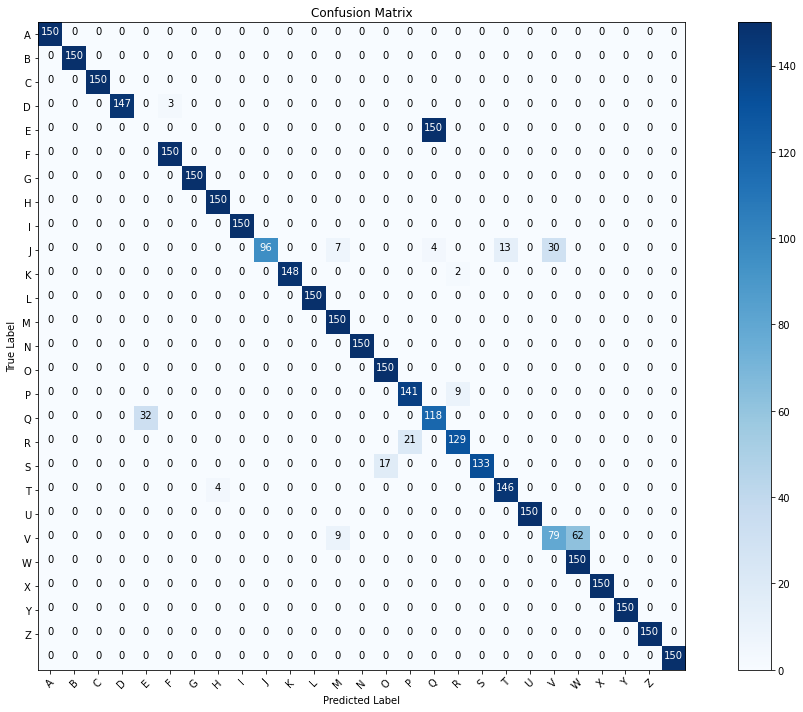

In [12]:
cm_plot_labels=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels,title='Confusion Matrix')

In [13]:
model_json1 = model.to_json()
with open("model-bw1.json", "w") as json_file:
    json_file.write(model_json1)
print('Model Saved')
model.save_weights('model-bw1.h5')
print('Weights saved')

Model Saved
Weights saved


# GUI and front end

In [2]:
from PIL import Image,ImageTk
import PIL.Image
import tkinter as tk
import cv2
import os
import numpy as np
from keras.models import model_from_json
import operator
import time
import sys, os
import matplotlib.pyplot as plt

from string import ascii_uppercase

In [2]:
import hunspell

In [20]:
class Application:
    def __init__(self):
        self.directory = "C:\\Users\\AVITA\\Jupyter notebooks\\"
        ##self.hs = hunspell.HunSpell('/usr/share/hunspell/en_GB-ize.dic', '/usr/share/hunspell/en_GB-ize.aff')
        self.vs = cv2.VideoCapture(0)
        self.current_image = None
        self.current_image2 = None
        
        self.json_file = open(self.directory+"model-bw.json", "r")
        self.model_json = self.json_file.read()
        self.json_file.close()
        self.loaded_model = model_from_json(self.model_json)
        self.loaded_model.load_weights(self.directory+"model-bw.h5")
        
#         self.json_file_dpq = open(self.directory+"model-bw-dpq.json" , "r")
#         self.model_json_dpq = self.json_file_dpq.read()
#         self.json_file_dpq.close()
#         self.loaded_model_dpq = model_from_json(self.model_json_dpq)
#         self.loaded_model_dpq.load_weights("model-bw-dpq.h5")
        
        self.ct = {}
        self.ct['blank'] = 0
        self.blank_flag = 0
        for i in ascii_uppercase:
            self.ct[i] = 0
        print("Loaded model from disk")

        for i in ascii_uppercase:
              self.ct[i] = 0
        print("Loaded model from disk")
        self.root = tk.Toplevel()
        self.root.title("Sign language to Text Converter")
        self.root.protocol('WM_DELETE_WINDOW', self.destructor)
        self.root.geometry("700x650")
        self.panel = tk.Label(self.root)
        self.panel.place(x = 65, y = 50, width = 560, height = 350)
        self.panel2 = tk.Label(self.root) # initialize image panel
        self.panel2.place(x = 335, y = 65, width = 250, height = 200)
        
        self.T = tk.Label(self.root)
        self.T.place(x=200,y = 5)
        self.T.config(text = "Sign Language to Text",font=("courier",20,"bold"))
        self.panel3 = tk.Label(self.root) # Current SYmbol
        self.panel3.place(x = 300,y=500)
        self.T1 = tk.Label(self.root)
        self.T1.place(x = 10,y = 500)
        self.T1.config(text="Character :",font=("Courier",20,"bold"))
        self.panel4 = tk.Label(self.root) # Word
        self.panel4.place(x = 300,y=550)
        self.T2 = tk.Label(self.root)
        self.T2.place(x = 10,y = 550)
        self.T2.config(text ="Word :",font=("Courier",20,"bold"))
        self.panel5 = tk.Label(self.root) # Sentence
        self.panel5.place(x = 300,y=600)
        self.T3 = tk.Label(self.root)
        self.T3.place(x = 10,y = 600)
        self.T3.config(text ="Sentence :",font=("Courier",20,"bold"))

#         self.T4 = tk.Label(self.root)
#         self.T4.place(x = 250,y = 820)
#         self.T4.config(text = "Suggestions",fg="red",font = ("Courier",40,"bold"))

        self.btcall = tk.Button(self.root,command = self.action_call,height = 0,width = 0)
        self.btcall.config(text = "About",font = ("Courier",14))
        self.btcall.place(x = 630, y = 0)

        self.str=""
        self.word=""
        self.current_symbol="Empty"
        self.photo="Empty"
        self.video_loop()
        
    def video_loop(self):
        ok, frame = self.vs.read()
        if ok:
            cv2image = cv2.flip(frame, 1)
            x1 = int(0.5*frame.shape[1])
            y1 = 10
            x2 = frame.shape[1]-10
            y2 = int(0.5*frame.shape[1])
            cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0) ,1)
            cv2image = cv2.cvtColor(cv2image, cv2.COLOR_BGR2RGBA)
            self.current_image = Image.fromarray(cv2image)
            imgtk = ImageTk.PhotoImage(image=self.current_image)
            self.panel.imgtk = imgtk
            self.panel.configure(image=imgtk)
            cv2image = cv2image[y1:y2, x1:x2]
            gray = cv2.cvtColor(cv2image, cv2.COLOR_BGR2GRAY)
            blur = cv2.GaussianBlur(gray,(5,5),2)
            th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
            ret, res = cv2.threshold(th3, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            self.predict(res)
            self.current_image2 = Image.fromarray(res)
            imgtk = ImageTk.PhotoImage(image=self.current_image2)
            
            self.panel2.imgtk = imgtk
            
            self.panel2.config(image=imgtk)
            self.panel3.config(text=self.current_symbol,font=("Courier",30))
            self.panel4.config(text=self.word,font=("Courier",20))
            self.panel5.config(text=self.str,font=("Courier",20))
        self.root.after(30, self.video_loop)

    def predict(self,test_image):
        test_image = cv2.resize(test_image, (224,224))
#         test_image1 = cv2.resize(test_image, (128, 128))
        
        img2 = np.zeros( ( np.array(test_image).shape[0], np.array(test_image).shape[1], 3 ) )
        img2[:,:,0] = test_image# same value in each channel
        img2[:,:,1] = test_image
        img2[:,:,2] = test_image
        result = self.loaded_model.predict(img2.reshape(1, 224, 224, 3))
#         result = self.loaded_model.predict(test_image1.reshape(1, 128, 128, 1))
#         result_dpq = self.loaded_model_dpq.predict(img2.reshape(1 , 224 , 224, 3))
        prediction={}
        prediction['blank'] = result[0][0] # the value at this position corressponds to proababilty of blank. [0][1],[0][2]...corresponds to a,b etc.
        inde = 1
        for i in ascii_uppercase:
            prediction[i] = result[0][inde] #probabilyt of each alphabet
            inde += 1
        #LAYER 1
        prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)#sorts to see which has max probabilty
        self.current_symbol = prediction[0][0]
#         if(self.current_symbol == 'D' or self.current_symbol == 'P' or self.current_symbol == 'Q'):
#             prediction = {}
#             prediction['D'] = result_dpq[0][0]
#             prediction['P'] = result_dpq[0][1]
#             prediction['Q'] = result_dpq[0][2]
            
#             prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)
#             self.current_symbol = prediction[0][0]
            
        if(self.current_symbol == 'blank'):
            for i in ascii_uppercase:
                self.ct[i] = 0
        self.ct[self.current_symbol] += 1
        if(self.ct[self.current_symbol] > 40):
            for i in ascii_uppercase:
                if i == self.current_symbol:
                    continue
                tmp = self.ct[self.current_symbol] - self.ct[i]
                if tmp < 0:
                    tmp *= -1
                if tmp <= 10:
                    self.ct['blank'] = 0
                    for i in ascii_uppercase:
                        self.ct[i] = 0
                    return
                
                ###Basically if the +ve or -ve difference is between the predicted symbol and any other alphabet is less than 20, it restarts
            self.ct['blank'] = 0
            for i in ascii_uppercase:
                self.ct[i] = 0
            if self.current_symbol == 'blank':
                if self.blank_flag == 0:
                    self.blank_flag = 1
                    if len(self.str) > 0:
                        self.str += " "
                    self.str += self.word
                    self.word = ""
            else:
                if(len(self.str) > 16):
                    self.str = ""
                self.blank_flag = 0
                self.word += self.current_symbol
                
    def destructor(self):
        print("Closing Application...")
        self.vs.release()
        cv2.destroyAllWindows()
        self.root.destroy()

        
    def destructor1(self):
        print("Closing Application...")
        self.root1.destroy()
        
    def action_call(self) :
        
        self.root1 = tk.Toplevel(self.root)
        self.root1.title("About")
        self.root1.protocol('WM_DELETE_WINDOW', self.destructor1)
        self.root1.geometry("600x600")
        
        # img = cv2.imread("Pictures/sir.jpg", 1)
        # # img = cv2.resize(img, (300, 300))
        # cv2.imwrite("Pictures/sir.png", img)
        # return 
        
        self.tx = tk.Label(self.root1)
        self.tx.place(x = 150,y = 10)
        self.tx.config(text = "Efforts By", fg="red", font = ("Courier",30,"bold"))

        self.img1=PIL.Image.open("D:\\College\\Sem 4\\Mini Project\\Pics\\Trisha.jfif")
        self.img1=self.img1.resize((180, 230), PIL.Image.ANTIALIAS)
        self.photo1 = ImageTk.PhotoImage(self.img1)
        self.w1 = tk.Label(self.root1, image = self.photo1)
        self.w1.image=self.photo1
        self.w1.place(x = 10, y = 200)
        self.tx6 = tk.Label(self.root1)
        self.tx6.place(x = 30,y = 450)
        self.tx6.config(text = "Trisha Shah\n20102A0004", font = ("Courier",15,"bold"))
       
        self.img2=PIL.Image.open("D:\College\Sem 4\Mini Project\Pics\Shipra.jpeg")
        self.img2=self.img2.resize((180, 230), PIL.Image.ANTIALIAS)
        self.photo2 = ImageTk.PhotoImage(self.img2)
        self.w2 = tk.Label(self.root1, image = self.photo2)
        self.w2.image=self.photo2
        self.w2.place(x = 220, y = 200)
        self.tx2 = tk.Label(self.root1)
        self.tx2.place(x = 230,y = 450)
        self.tx2.config(text = "Shipra Dagli\n20102A0012", font = ("Courier",15,"bold"))

        self.img3=PIL.Image.open("D:\\College\\Sem 4\\Mini Project\\Pics\\Vaibhavi.jpg")
        self.img3=self.img3.resize((180, 230), PIL.Image.ANTIALIAS)
        self.photo3 = ImageTk.PhotoImage(self.img3)
        self.w3 = tk.Label(self.root1, image = self.photo3)
        self.w3.image=self.photo3
        self.w3.place(x = 410, y = 200)
        self.tx3 = tk.Label(self.root1)
        self.tx3.place(x = 415,y = 450)
        self.tx3.config(text = "Vaibhavi Raje\n20102B0055", font = ("Courier",15,"bold"))
    
      
        
print("Starting Application...")
pba = Application()
pba.root.mainloop()       


Starting Application...
Loaded model from disk
Loaded model from disk
Closing Application...
